## Q1: Data Collection and Data Preprocessing

**1. Import required libraries and import csv file into a dataframe.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
file_path = 'honey.csv'
honey_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
honey_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


**2. Show the column names of all individual datasets.**

- state
- numcol
- yieldpercol
- totalprod
- stocks
- priceperlb
- prodvalue
- year

**3. Change the datatype of all columns except price per lb**

In [3]:
# Checking the current data types of all columns
honey_data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

The current data types of the columns are as follows:

- state: object (string)
- numcol: float64
- yieldpercol: int64
- totalprod: float64
- stocks: float64
- priceperlb: float64
- prodvalue: float64
- year: int64

In [4]:
# Converting data types
honey_data["numcol"] = honey_data["numcol"].astype('int64', errors='ignore')
honey_data["totalprod"] = honey_data["totalprod"].astype('int64', errors='ignore')
honey_data["stocks"] = honey_data["stocks"].astype('int64', errors='ignore')
honey_data["prodvalue"] = honey_data["prodvalue"].astype('int64', errors='ignore')
honey_data["state"] = honey_data["state"].astype('string')

# Verifying the changes
honey_data.dtypes

state          string[python]
numcol                  int64
yieldpercol             int64
totalprod               int64
stocks                  int64
priceperlb            float64
prodvalue               int64
year                    int64
dtype: object

The data types have been successfully updated as follows:

- state: string
- numcol: int64
- yieldpercol: int64
- totalprod: int64
- stocks: int64
- priceperlb: float64 (unchanged)
- prodvalue: int64
- year: int64

**4. Share 5-point summary and the details about the dataset.**

In [5]:
# 5-point summary of the dataset
five_point_summary = honey_data.describe()

# General details about the dataset
dataset_details = {
    "Number of Rows": honey_data.shape[0],
    "Number of Columns": honey_data.shape[1],
    "Missing Values": honey_data.isnull().sum().sum()  # Total number of missing values in the dataset
}

In [6]:
five_point_summary

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [7]:
dataset_details

{'Number of Rows': 626, 'Number of Columns': 8, 'Missing Values': 0}

**5. Find the average production per state and shape of dataset.**

In [8]:
# Calculating average production per state
average_production_per_state = honey_data.groupby('state')['totalprod'].mean()

# Shape of the dataset
dataset_shape = honey_data.shape

average_production_per_state

state
AL    8.254667e+05
AR    2.810400e+06
AZ    2.032267e+06
CA    2.316900e+07
CO    1.750600e+06
FL    1.646987e+07
GA    3.299933e+06
HI    8.431333e+05
IA    2.080000e+06
ID    4.410667e+06
IL    4.983333e+05
IN    4.840000e+05
KS    7.079333e+05
KY    2.296667e+05
LA    3.627333e+06
MD    2.110000e+05
ME    2.467333e+05
MI    4.854667e+06
MN    9.624000e+06
MO    8.715333e+05
MS    1.456867e+06
MT    1.043747e+07
NC    5.427333e+05
ND    3.167233e+07
NE    3.158600e+06
NJ    3.995333e+05
NM    4.764667e+05
NV    4.392727e+05
NY    3.937467e+06
OH    1.040067e+06
OK    2.011667e+05
OR    2.121400e+06
PA    1.295600e+06
SC    3.433333e+05
SD    1.774273e+07
TN    4.077333e+05
TX    6.993600e+06
UT    1.179067e+06
VA    2.665333e+05
VT    3.880667e+05
WA    2.687733e+06
WI    5.455533e+06
WV    3.212000e+05
WY    2.617933e+06
Name: totalprod, dtype: float64

In [9]:
dataset_shape

(626, 8)

**6. Check the distribution of records for every year.**

In [10]:
# Checking the distribution of records for every year
yearly_distribution = honey_data['year'].value_counts().sort_index()

yearly_distribution

year
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: count, dtype: int64

**7. Find top 10 years with highest totalprod.**

In [11]:
# Finding top 10 years with highest total production
top_10_years_totalprod = honey_data.groupby('year')['totalprod'].sum().sort_values(ascending=False).head(10)

top_10_years_totalprod

year
2000    219558000
1998    219519000
1999    202387000
2001    185748000
2004    182729000
2003    181372000
2010    175294000
2005    173969000
2002    171265000
2008    162972000
Name: totalprod, dtype: int64

**8. Find years with highest and lowest totalprod.**

In [12]:
# Finding the years with the highest and lowest total production
highest_totalprod_year = honey_data.groupby('year')['totalprod'].sum().idxmax()
lowest_totalprod_year = honey_data.groupby('year')['totalprod'].sum().idxmin()

highest_totalprod = honey_data.groupby('year')['totalprod'].sum().max()
lowest_totalprod = honey_data.groupby('year')['totalprod'].sum().min()

highest_totalprod_year, highest_totalprod, lowest_totalprod_year, lowest_totalprod

(2000, 219558000, 2012, 140907000)

**9. Find top 10 states with highest totalprod.**

In [13]:
# Finding top 10 states with highest total production
top_10_states_totalprod = honey_data.groupby('state')['totalprod'].sum().sort_values(ascending=False).head(10)

top_10_states_totalprod

state
ND    475085000
CA    347535000
SD    266141000
FL    247048000
MT    156562000
MN    144360000
TX    104904000
WI     81833000
MI     72820000
ID     66160000
Name: totalprod, dtype: int64

**10. Show bottom 10 years with highest totalprod.**

In [14]:
# Finding bottom 10 years with the highest total production
bottom_10_years_totalprod = honey_data.groupby('year')['totalprod'].sum().sort_values(ascending=False).tail(10)

bottom_10_years_totalprod

year
2003    181372000
2010    175294000
2005    173969000
2002    171265000
2008    162972000
2006    154238000
2007    147621000
2011    147201000
2009    145068000
2012    140907000
Name: totalprod, dtype: int64

## Question 2: Data Visualization

**1. Visualize Q 1.9 and Q1.10**

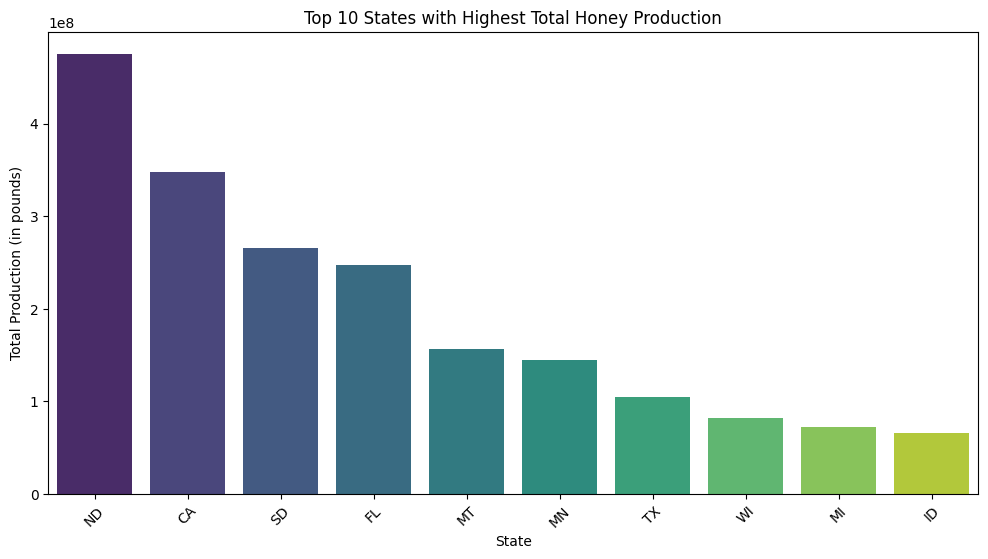

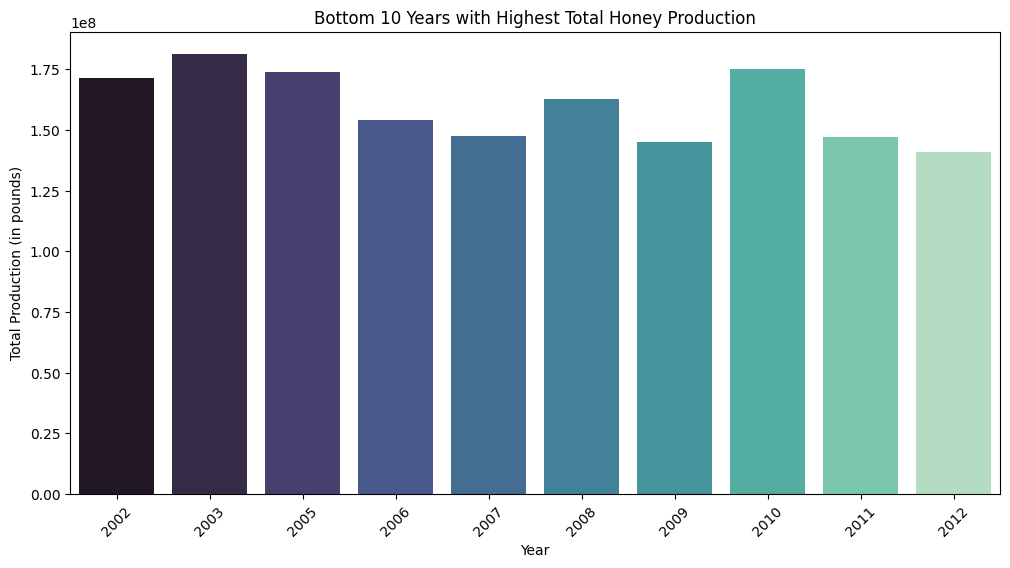

In [15]:
# Plotting top 10 states with highest total production
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states_totalprod.index, y=top_10_states_totalprod.values, palette="viridis")
plt.title('Top 10 States with Highest Total Honey Production')
plt.xlabel('State')
plt.ylabel('Total Production (in pounds)')
plt.xticks(rotation=45)
plt.show()

# Plotting bottom 10 years with highest total production
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_years_totalprod.index, y=bottom_10_years_totalprod.values, palette="mako")
plt.title('Bottom 10 Years with Highest Total Honey Production')
plt.xlabel('Year')
plt.ylabel('Total Production (in pounds)')
plt.xticks(rotation=45)
plt.show()

***The visualizations are as follows:***

- The first chart shows the Top 10 States with Highest Total Honey Production. States like North Dakota, California, and South Dakota lead in honey production.
- The second chart shows the Bottom 10 Years with Highest Total Honey Production. Years like 2009, 2012 have lowest Honey production.

**2. Find states with minimum and max price per lb.**

In [16]:
# Finding states with minimum and maximum price per lb
min_price_state = honey_data.groupby('state')['priceperlb'].mean().idxmin()
max_price_state = honey_data.groupby('state')['priceperlb'].mean().idxmax()

min_price = honey_data.groupby('state')['priceperlb'].mean().min()
max_price = honey_data.groupby('state')['priceperlb'].mean().max()

min_price_state, min_price, max_price_state, max_price

('LA', 1.054, 'VA', 2.3200000000000003)

***States with Minimum and Maximum Price per Pound:***

- The state with the minimum average price per pound of honey is Louisiana (LA) with an average price of 1.05.
- The state with the maximum average price per pound of honey is Virginia (VA) with an average price of 2.32.

**3. Visualize Q 2.2**

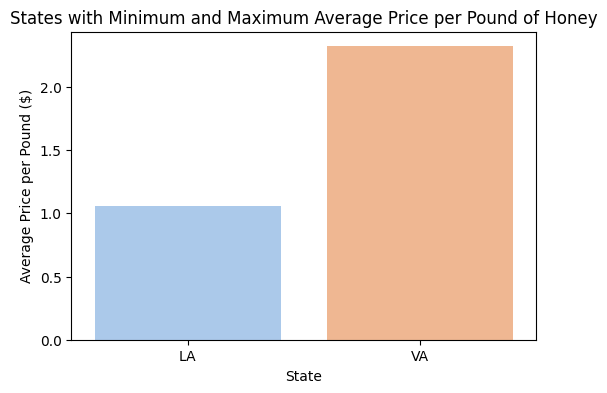

In [17]:
# Visualization for States with Min and Max Price per lb
states = [min_price_state, max_price_state]
prices = [min_price, max_price]

plt.figure(figsize=(6, 4))
sns.barplot(x=states, y=prices, palette="pastel")
plt.title('States with Minimum and Maximum Average Price per Pound of Honey')
plt.xlabel('State')
plt.ylabel('Average Price per Pound ($)')
plt.show()

The visualization above compares the States with Minimum and Maximum Average Price per Pound of Honey:

- Louisiana (LA) has the minimum average price.
- Virginia (VA) has the maximum average price.

**4. Visualize the totalprod with respect to year.**

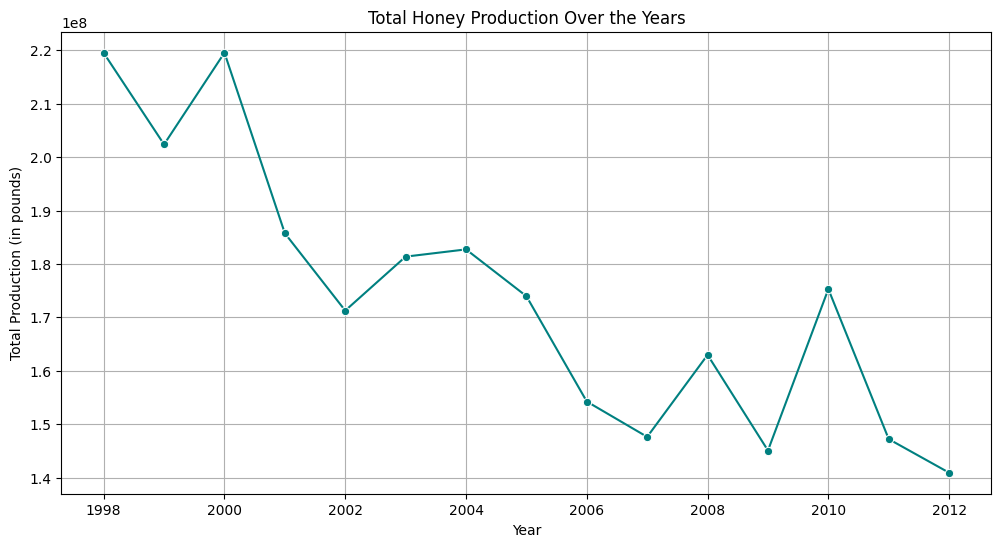

In [18]:
# Visualization of total production with respect to year
totalprod_yearly = honey_data.groupby('year')['totalprod'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=totalprod_yearly.index, y=totalprod_yearly.values, marker='o', color='teal')
plt.title('Total Honey Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (in pounds)')
plt.grid(True)
plt.show()

The line plot above shows the Total Honey Production Over the Years:

- It illustrates the trends in honey production from 1998 to 2012.
- There's a noticeable fluctuation in production, with a peak around the year 2000 and a decline towards 2012.

**5. Visualize pairplot and share your insights.**

<Figure size 1000x1000 with 0 Axes>

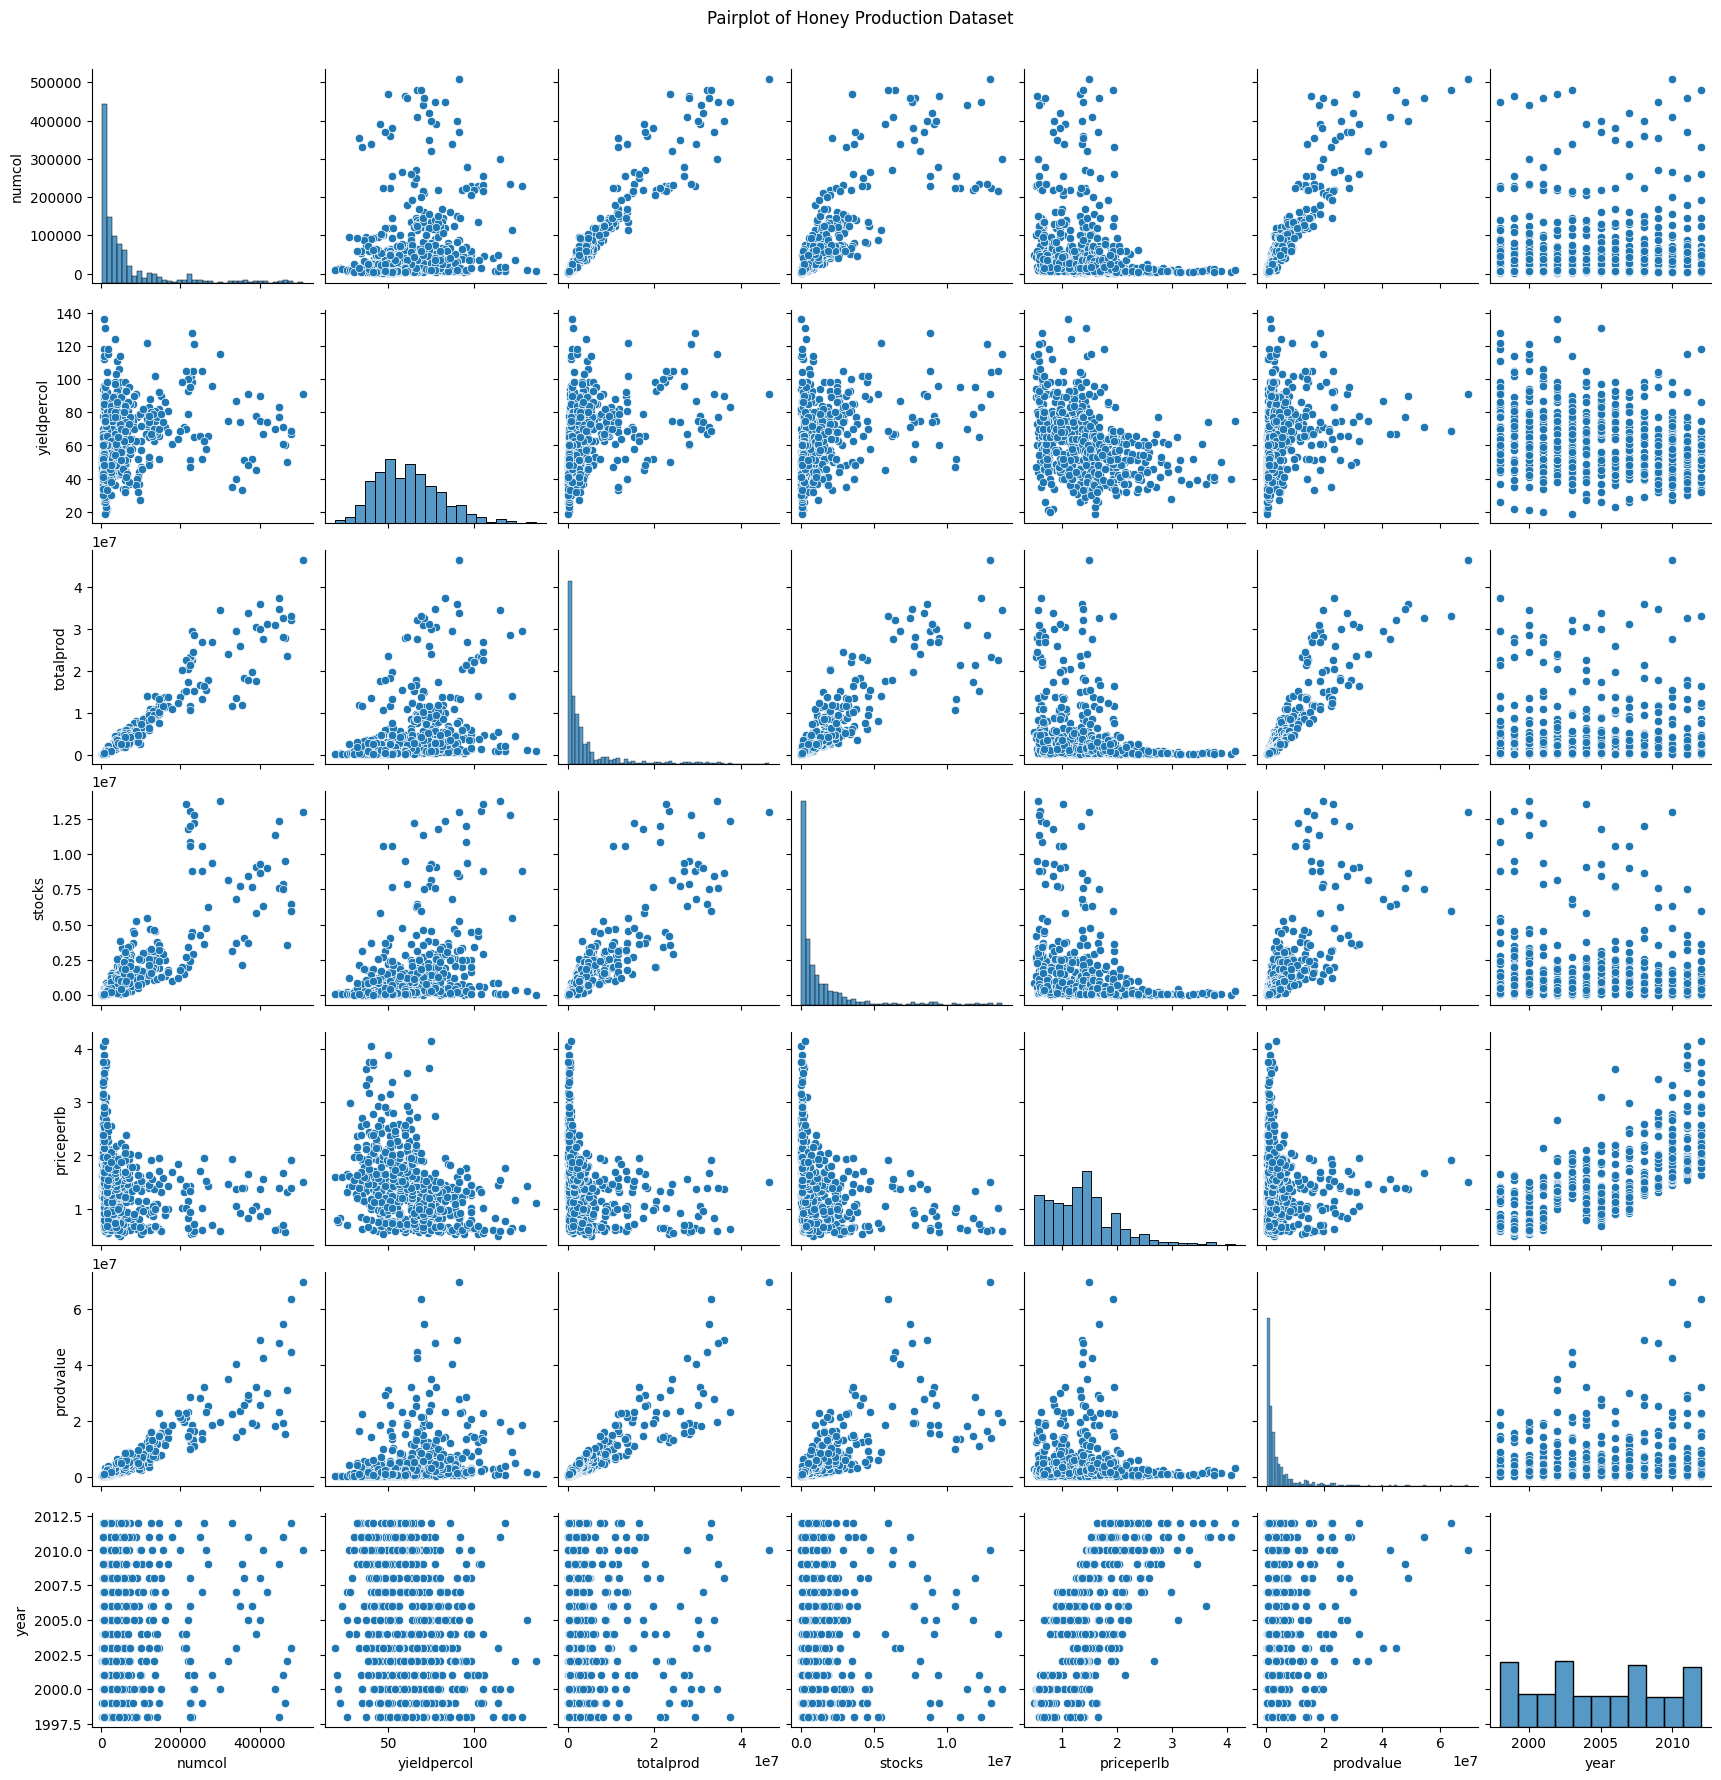

In [19]:
# Creating a pairplot of the dataset
plt.figure(figsize=(10, 10))
sns.pairplot(honey_data)
plt.suptitle('Pairplot of Honey Production Dataset', y=1.02)
plt.show()

The pairplot above visualizes the relationships between the different numerical variables in the honey production dataset. Here are some insights:

- `Total Production (totalprod)`: This variable shows a positive correlation with the number of colonies (numcol) and the stocks. As the number of colonies increases, the total production also tends to increase.
- `Yield per Colony (yieldpercol)`: This variable doesn't show a strong linear relationship with other variables. However, variations in yield per colony might be influenced by factors not captured in the dataset.
- `Stocks`: There's a visible positive relationship between stocks and total production, suggesting that higher production leads to higher stocks.
- `Price per Pound (priceperlb)`: The price per pound doesn't seem to have a clear linear relationship with production variables. This suggests that prices may be influenced more by external market factors.
- `Year`: The year variable shows how different factors have trended over time. A gradual decrease in total production is visible over the years.

## Question 3: Statistical Analysis

**1. Visualize distribution of numcol, yieldpercol, priceperlb, stocks in one single frame using subplots and share your insights.**

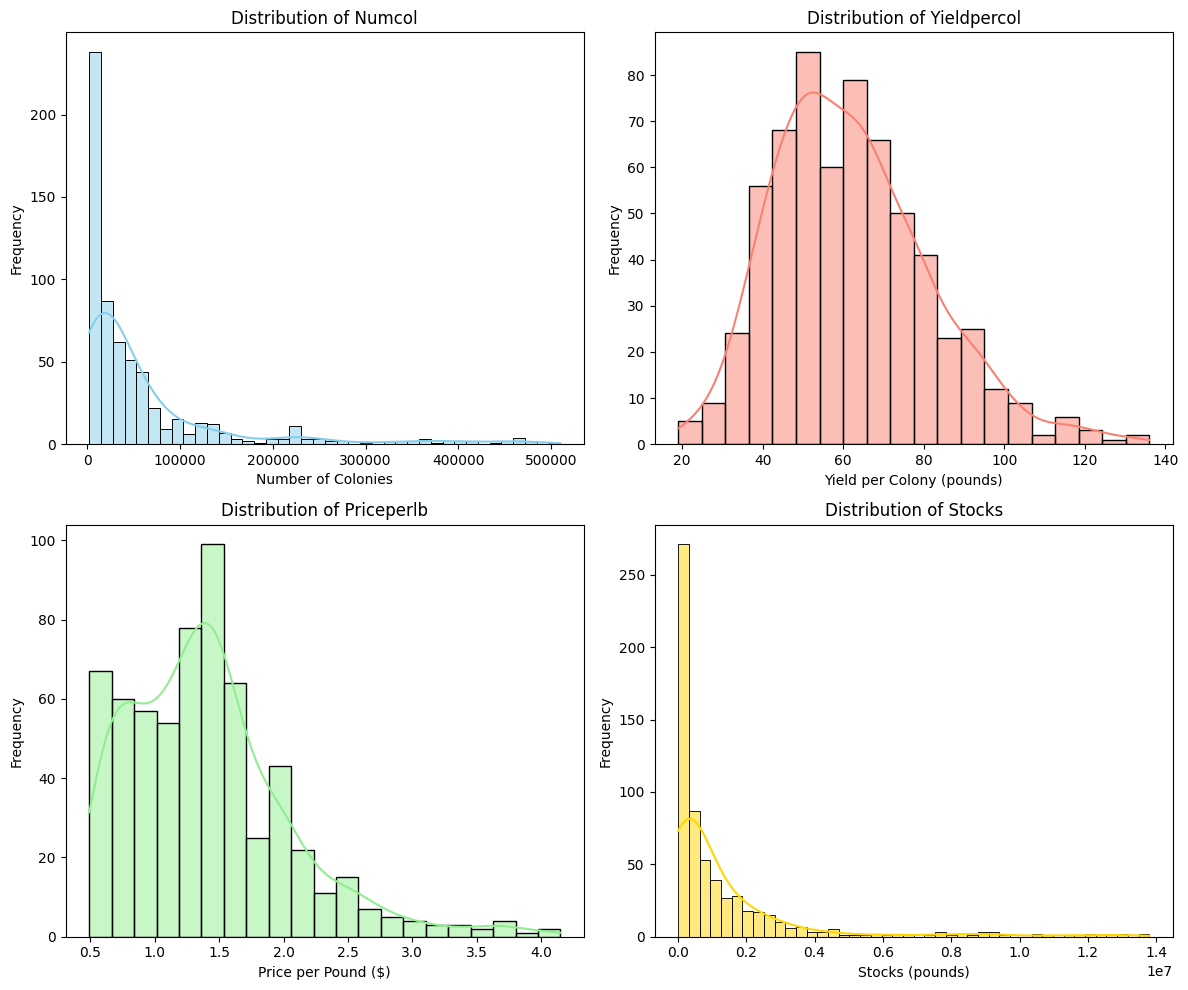

In [20]:
# Setting up the subplot framework
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for numcol (Number of honey producing colonies)
sns.histplot(honey_data['numcol'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Numcol')
axes[0, 0].set_xlabel('Number of Colonies')
axes[0, 0].set_ylabel('Frequency')

# Histogram for yieldpercol (Honey yield per colony)
sns.histplot(honey_data['yieldpercol'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Yieldpercol')
axes[0, 1].set_xlabel('Yield per Colony (pounds)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for priceperlb (Average price per pound)
sns.histplot(honey_data['priceperlb'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Priceperlb')
axes[1, 0].set_xlabel('Price per Pound ($)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for stocks (Stocks held by producers)
sns.histplot(honey_data['stocks'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Stocks')
axes[1, 1].set_xlabel('Stocks (pounds)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms provide insights into the distribution of `numcol`, `yieldpercol`, `priceperlb`, and `stocks`:

- **Numcol (Number of Honey Producing Colonies):**
    - This distribution is right-skewed, indicating that most states have a lower number of colonies, with few states having a very high number.
- **Yieldpercol (Honey Yield per Colony):**
    - The distribution appears to be somewhat normal but slightly skewed to the right, indicating variability in yield per colony across states.
- **Priceperlb (Average Price per Pound):**
    - The price per pound also shows a right-skewed distribution, suggesting that higher prices are less common.
- **Stocks (Stocks held by Producers):**
    - Similar to numcol, the distribution of stocks is right-skewed, indicating that larger stock quantities are less frequent.

**2. Visualize, boxplot and confirm if there are any outliers.**

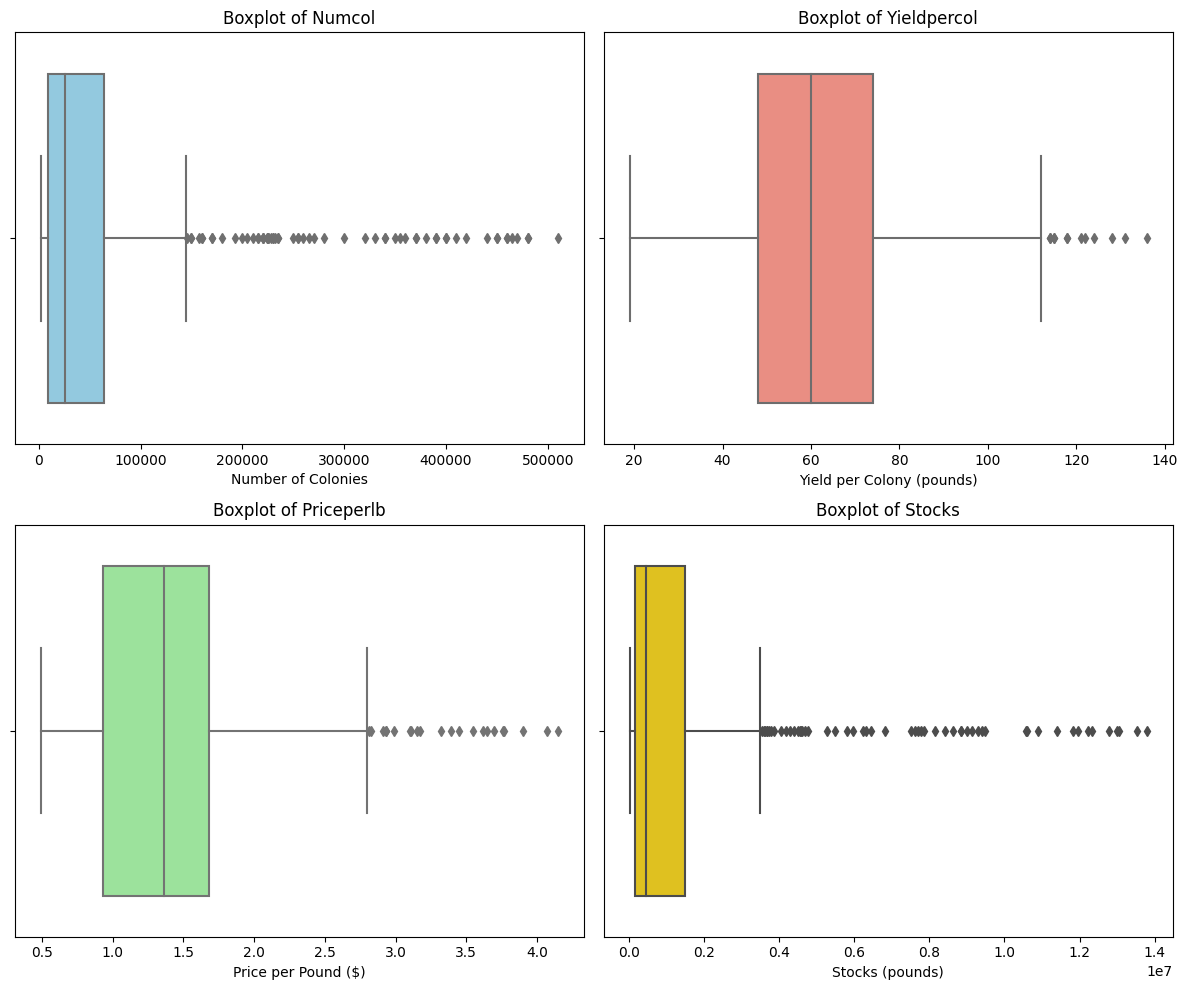

In [21]:
# Setting up the subplot framework for boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for numcol
sns.boxplot(x=honey_data['numcol'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Boxplot of Numcol')
axes[0, 0].set_xlabel('Number of Colonies')

# Boxplot for yieldpercol
sns.boxplot(x=honey_data['yieldpercol'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Boxplot of Yieldpercol')
axes[0, 1].set_xlabel('Yield per Colony (pounds)')

# Boxplot for priceperlb
sns.boxplot(x=honey_data['priceperlb'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Boxplot of Priceperlb')
axes[1, 0].set_xlabel('Price per Pound ($)')

# Boxplot for stocks
sns.boxplot(x=honey_data['stocks'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Boxplot of Stocks')
axes[1, 1].set_xlabel('Stocks (pounds)')

plt.tight_layout()
plt.show()

The boxplots reveal the presence of outliers in the dataset:

- **Numcol** (Number of Honey Producing Colonies):
    - Several outliers are present, indicating states with unusually high numbers of colonies.
- **Yieldpercol** (Honey Yield per Colony):
    - There are a few outliers, suggesting some states have unusually high yields per colony.
- **Priceperlb** (Average Price per Pound):
    - The presence of outliers indicates that there are instances of unusually high honey prices.
- **Stocks** (Stocks held by Producers):
    - Similar to numcol, there are outliers indicating states with unusually large stock quantities.

**3. Find Skewness and Kurtosis of complete dataframe.**

In [22]:
# Select only numeric columns for skewness and kurtosis calculations
numeric_cols = honey_data.select_dtypes(include=['number'])

# Calculating Skewness and Kurtosis for numeric columns
skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 numcol         2.762265
yieldpercol    0.693433
totalprod      2.901248
stocks         3.231799
priceperlb     1.194120
prodvalue      3.841915
year           0.046555
dtype: float64

Kurtosis:
 numcol          7.880120
yieldpercol     0.593365
totalprod       8.897969
stocks         11.354505
priceperlb      2.113795
prodvalue      19.316621
year           -1.207826
dtype: float64


The skewness and kurtosis values for the numerical columns in the dataset are as follows:

**Skewness:**
- Indicates the degree of asymmetry of the distribution.
  - `numcol`: 2.76 (Highly skewed to the right)
  - `yieldpercol`: 0.69 (Moderately skewed to the right)
  - `totalprod`: 2.90 (Highly skewed to the right)
  - `stocks`: 3.23 (Highly skewed to the right)
  - `priceperlb`: 1.19 (Moderately skewed to the right)
  - `prodvalue`: 3.84 (Highly skewed to the right)
  - `year`: 0.05 (Fairly symmetrical)

**Kurtosis:**
- Indicates the "tailedness" of the distribution.
  - `numcol`: 7.88 (Leptokurtic, heavy tails)
  - `yieldpercol`: 0.59 (Leptokurtic, heavy tails)
  - `totalprod`: 8.90 (Leptokurtic, heavy tails)
  - `stocks`: 11.35 (Leptokurtic, heavy tails)
  - `priceperlb`: 2.11 (Leptokurtic, heavy tails)
  - `prodvalue`: 19.32 (Leptokurtic, heavy tails)
  - `year`: -1.21 (Platykurtic, light tails)

**4.  Make a new copy of dataset and use for further analysis.**

In [23]:
# Making a new copy of the dataset
honey_data_copy = honey_data.copy()

# Confirming the creation of the copy
"honey_data_copy created with shape: " + str(honey_data_copy.shape)

'honey_data_copy created with shape: (626, 8)'

**5. Try to make the skewed data as normal as possible & visualize the same**

In [24]:
# Checking for zero values in the skewed columns
columns_to_transform = ['numcol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']
zero_values_check = (honey_data_copy[columns_to_transform] == 0).sum()

# Applying log transformation with a small constant (to avoid log(0))
honey_data_transformed = honey_data_copy.copy()
for col in columns_to_transform:
    honey_data_transformed[col] = np.log(honey_data_transformed[col] + 1)

In [25]:
zero_values_check

numcol        0
totalprod     0
stocks        0
priceperlb    0
prodvalue     0
dtype: int64

In [26]:
honey_data_transformed[columns_to_transform].head()

,numcol,totalprod,stocks,priceperlb,prodvalue
0,9.680406,13.943025,11.976666,0.542324,13.614619
1,10.915107,15.009433,14.210926,0.494696,14.563146
2,10.878066,15.052435,14.339056,0.463734,14.525024
3,13.017005,17.435843,16.327221,0.482426,16.957808
4,10.203629,14.480259,14.281758,0.530628,14.123731


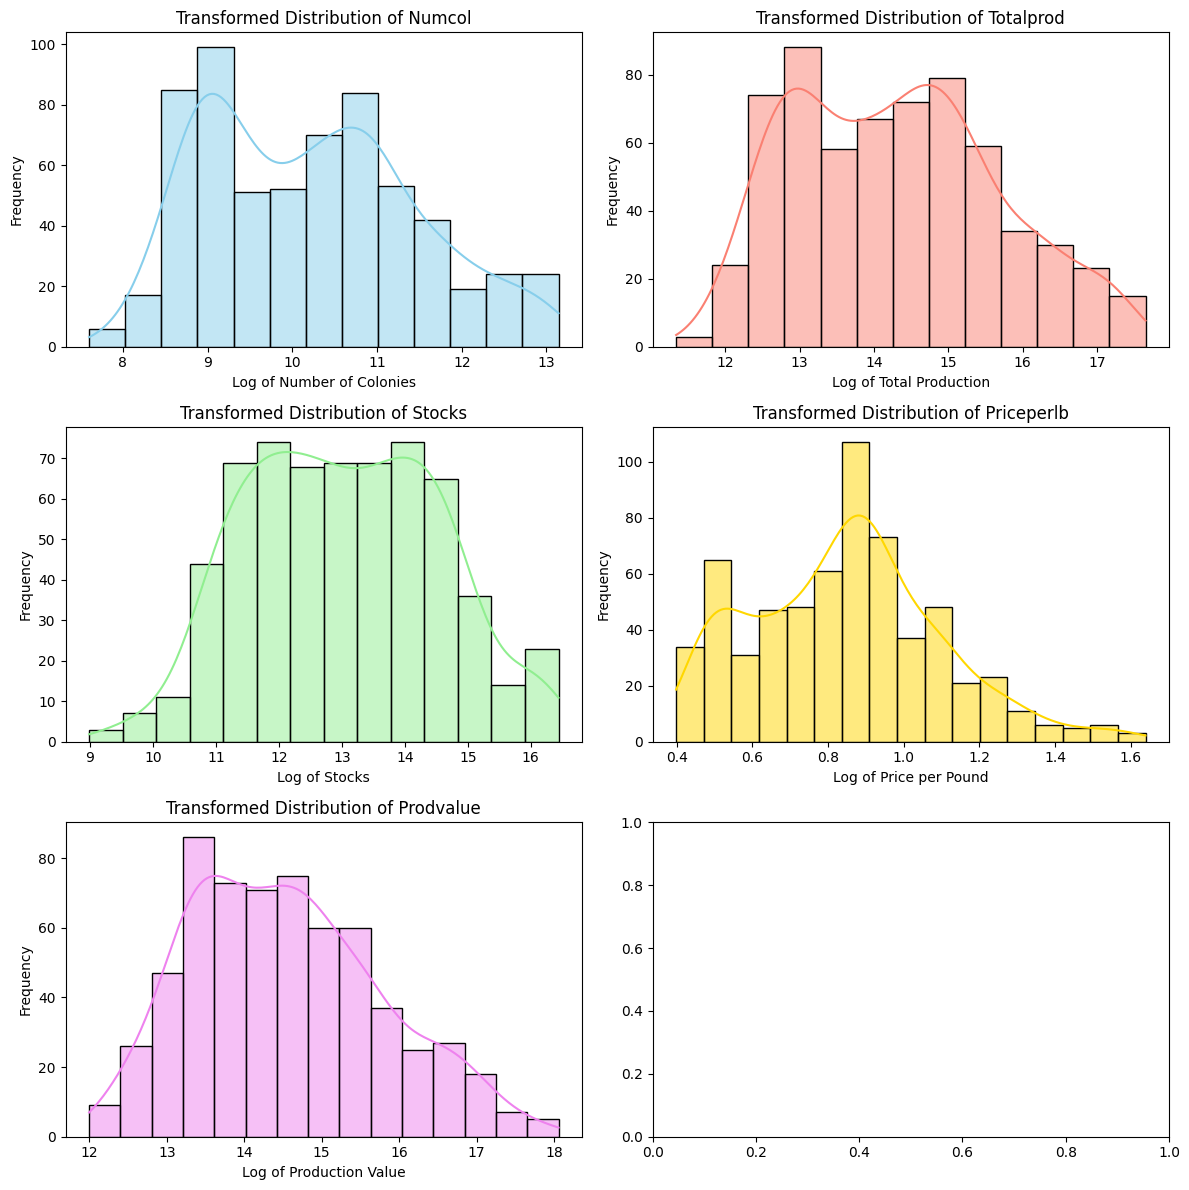

In [27]:
# Setting up the subplot framework for the transformed distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Histogram for transformed numcol
sns.histplot(honey_data_transformed['numcol'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Transformed Distribution of Numcol')
axes[0, 0].set_xlabel('Log of Number of Colonies')
axes[0, 0].set_ylabel('Frequency')

# Histogram for transformed totalprod
sns.histplot(honey_data_transformed['totalprod'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Transformed Distribution of Totalprod')
axes[0, 1].set_xlabel('Log of Total Production')
axes[0, 1].set_ylabel('Frequency')

# Histogram for transformed stocks
sns.histplot(honey_data_transformed['stocks'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Transformed Distribution of Stocks')
axes[1, 0].set_xlabel('Log of Stocks')
axes[1, 0].set_ylabel('Frequency')

# Histogram for transformed priceperlb
sns.histplot(honey_data_transformed['priceperlb'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Transformed Distribution of Priceperlb')
axes[1, 1].set_xlabel('Log of Price per Pound')
axes[1, 1].set_ylabel('Frequency')

# Histogram for transformed prodvalue
sns.histplot(honey_data_transformed['prodvalue'], kde=True, ax=axes[2, 0], color='violet')
axes[2, 0].set_title('Transformed Distribution of Prodvalue')
axes[2, 0].set_xlabel('Log of Production Value')
axes[2, 0].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()


The histograms display the transformed distributions:

- **Numcol (Log of Number of Colonies):**
  - The distribution now appears more symmetric, indicating a successful reduction in right skewness.
- **Totalprod (Log of Total Production):**
  - Similar to `numcol`, the skewness has been reduced, resulting in a more normal-like distribution.
- **Stocks (Log of Stocks):**
  - The transformation has made the distribution more normal, although it's still slightly right-skewed.
- **Priceperlb (Log of Price per Pound):**
  - The transformation has reduced the right skewness, creating a more bell-shaped distribution.
- **Prodvalue (Log of Production Value):**
  - The distribution is more balanced now, with reduced right skewness.

The logarithmic transformation has effectively normalized these distributions, making them more suitable for statistical analyses that assume normality. 